## The locus $uMPS(D,d,N)$ of uniform matrix product states is defined as the constructible image of the polynomial map $$ (\mathbb{C}^{D \times D})^d \to (\mathbb{C}^d)^{\otimes N}, (M_0, \ldots, M_{d-1}) \mapsto \sum_{0 \leq i_1, \ldots, i_N \leq d-1} tr(M_{i_1} \cdots M_{i_N}) e_{i_1} \otimes \cdots \otimes e_{i_N} \mbox{.}$$
## Here we consider the case $(D,d,N) = (2,2,5)$.

Our implementation $\mathtt{ConstructibleImage}$ finishes in around 3 minutes and outperforms
* $\mathtt{totalImage}$ (Macaulay2 package $\mathtt{TotalImage}$ [HMS18,CMS])
* $\mathtt{grobcov}$ (Singular package $\mathtt{grobcov.lib}$ [MW10])
* $\mathtt{PolynomialMapImage}$ ($\mathsf{Maple}$ package $\mathtt{RegularChains}$ [CGL+07])
* $\mathtt{Comprehensive}$ ($\mathsf{Maple}$ package $\mathtt{AlgebraicThomas}$ [BGLHR12])

which did not finish after a day.


[HMS18] Corey Harris, Mateusz Michałek, and Emre Can Sertöz, Computing images of polynomial maps, (arXiv:1801.00827), 2018.

[CMS] Adam Czaplin ́ski, Mateusz Michałek, and Tim Seynnaeve, Uniform matrix product states from an algebraic geometer’s point of view.

[MW10] Antonio Montes and Michael Wibmer, Gröbner bases for polynomial systems with parameters, J. Symbolic Comput. 45 (2010), no. 12, 1391–1425. MR 2733386

[CGL+07] Changbo Chen, Oleg Golubitsky, François Lemaire, Marc Moreno Maza, and Wei Pan, Com- prehensive triangular decomposition, Computer Algebra in Scientific Computing (Berlin, Heidelberg) (Victor G. Ganzha, Ernst W. Mayr, and Evgenii V. Vorozhtsov, eds.), Springer Berlin Heidelberg, 2007, pp. 73–101.

[BGLHR12] Thomas Bächler, Vladimir Gerdt, Markus Lange-Hegermann, and Daniel Robertz, Algorithmic Thomas decomposition of algebraic and differential systems, J. Symbolic Comput. 47 (2012), no. 10, 1233–1266, (arXiv:1108.0817). MR 2926124

In [1]:
using CapAndHomalg

CapAndHomalg v1.5.1
Imported OSCAR's components GAP and Singular_jll
Type: ?CapAndHomalg for more information


In [2]:
LoadPackage( "ZariskiFrames" )

In [3]:
ℚ = HomalgFieldOfRationalsInSingular( )

GAP: Q

In [4]:
B = ℚ["t00000,t00001,t00011,t00111,t01111,t11111,t00101,t11010"]

GAP: Q[t00000,t00001,t00011,t00111,t01111,t11111,t00101,t11010]

In [5]:
T = ℚ["s_0..4"]

GAP: Q[s_0,s_1,s_2,s_3,s_4]

In [6]:
ϕ = RingMap( HomalgMatrix( "-1/4*s_0^5+5/4*s_0*s_2^2,-1/4*s_0^4*s_1+1/4*s_1*s_2^2+s_0*s_2*s_3,-1/4*s_0^3*s_1^2-1/4*s_0*s_1^2*s_2+1/2*s_0^2*s_1*s_3-1/4*s_0^3*s_4+1/2*s_1*s_2*s_3+3/4*s_0*s_2*s_4,-1/4*s_0^2*s_1^3-1/4*s_1^3*s_2+1/2*s_0*s_1^2*s_3-1/4*s_0^2*s_1*s_4+3/4*s_1*s_2*s_4+1/2*s_0*s_3*s_4,-1/4*s_0*s_1^4+s_1*s_3*s_4+1/4*s_0*s_4^2,-1/4*s_1^5+5/4*s_1*s_4^2,-1/4*s_0^3*s_1^2+1/4*s_0*s_1^2*s_2-1/2*s_0^2*s_1*s_3+1/4*s_0^3*s_4+1/2*s_1*s_2*s_3+s_0*s_3^2-1/4*s_0*s_2*s_4,-1/4*s_0^2*s_1^3+1/4*s_1^3*s_2-1/2*s_0*s_1^2*s_3+1/4*s_0^2*s_1*s_4+s_1*s_3^2-1/4*s_1*s_2*s_4+1/2*s_0*s_3*s_4", Length( Indeterminates( B ) ), 1, T ),  B, T );

In [7]:
Display( ϕ )

Q[s_0,s_1,s_2,s_3,s_4]
  ^
  |
[ -1/4*s_0^5+5/4*s_0*s_2^2, -1/4*s_0^4*s_1+1/4*s_1*s_2^2+s_0*s_2*s_3, -1/4*s_0^3*s_1^2-1/4*s_0*s_1^2*s_2+1/2*s_0^2*s_1*s_3-1/4*s_0^3*s_4+1/2*s_1*s_2*s_3+3/4*s_0*s_2*s_4, -1/4*s_0^2*s_1^3-1/4*s_1^3*s_2+1/2*s_0*s_1^2*s_3-1/4*s_0^2*s_1*s_4+3/4*s_1*s_2*s_4+1/2*s_0*s_3*s_4, -1/4*s_0*s_1^4+s_1*s_3*s_4+1/4*s_0*s_4^2, -1/4*s_1^5+5/4*s_1*s_4^2, -1/4*s_0^3*s_1^2+1/4*s_0*s_1^2*s_2-1/2*s_0^2*s_1*s_3+1/4*s_0^3*s_4+1/2*s_1*s_2*s_3+s_0*s_3^2-1/4*s_0*s_2*s_4, -1/4*s_0^2*s_1^3+1/4*s_1^3*s_2-1/2*s_0*s_1^2*s_3+1/4*s_0^2*s_1*s_4+s_1*s_3^2-1/4*s_1*s_2*s_4+1/2*s_0*s_3*s_4 ]
  |
  |
Q[t00000,t00001,t00011,t00111,t01111,t11111,t00101,t11010]


In [8]:
im = ConstructibleImage( ϕ, rbhull_decomposition = false )

GAP: ( V_{Q[t00000,t00001,t00011,t00111,t01111,t11111,t00101,t11010]}( I1 ) \ V_{Q[t00000,t00001,t00011,t00111,t01111,t11111,t00101,t11010]}( J1_1 ) ) ∪ ( V_{Q[t00000,t00001,t00011,t00111,t01111,t11111,t00101,t11010]}( I2 ) \ V_{Q[t00000,t00001,t00011,t00111,t01111,t11111,t00101,t11010]}( J2_1 ) )

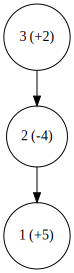

In [9]:
Visualize( im )

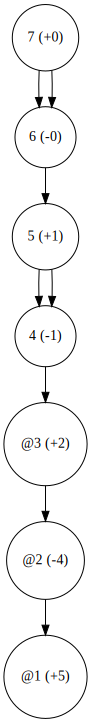

In [10]:
Visualize( im, all = true )

In [9]:
Display( im )

( V( <t00011*t00111^3-4*t00011^2*t00111*t01111+2*t00001*t00111^2*t01111+3*t00001*t00011*t01111^2-t00000*t00111*t01111^2+t00011^3*t11111-t00001*t00011*t00111*t11111-2*t00111^3*t00101+2*t00011*t00111*t01111*t00101-3*t00001*t01111^2*t00101+3*t00111*t01111*t00101^2-t11111*t00101^3+2*t00011*t00111^2*t11010+t00011^2*t01111*t11010-3*t00001*t00111*t01111*t11010+t00000*t01111^2*t11010-2*t00001*t00011*t11111*t11010+t00000*t00111*t11111*t11010-t00111^2*t00101*t11010-2*t00011*t01111*t00101*t11010+3*t00001*t11111*t00101*t11010+t00001*t01111*t11010^2-t00000*t11111*t11010^2,t00001*t00111^3-t00011^3*t01111-t00000*t00111^2*t01111+t00000*t00011*t01111^2+t00001*t00011^2*t11111-t00001^2*t00111*t11111-t00011*t00111^2*t00101+t00001*t00111*t01111*t00101-t00000*t01111^2*t00101-t00001*t00011*t11111*t00101+t00000*t00111*t11111*t00101-t00111^2*t00101^2+2*t00011*t01111*t00101^2-t01111*t00101^3+t00011^2*t00111*t11010-t00001*t00011*t01111*t11010+t00000*t00111*t01111*t11010+t00001^2*t11111*t11010-t00000*t00011*t1111